In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# Ajouter le dossier src au path pour importer le fichier de config
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
try:
    import config
except ModuleNotFoundError:
    # Si le module config n'est pas trouvé, essayer d'autres chemins possibles
    possible_paths = [
        os.path.join('..', 'src'),
        os.path.join('.', 'src'),
        os.path.join('..', '..', 'src'),
        '.'
    ]
    
    config_found = False
    for path in possible_paths:
        abs_path = os.path.abspath(path)
        if abs_path not in sys.path:
            sys.path.insert(0, abs_path)
        try:
            import config
            config_found = True
            print(f"Module config trouvé dans : {abs_path}")
            break
        except ModuleNotFoundError:
            continue
    
    if not config_found:
        print("ERREUR : Impossible de trouver le module config.")
        print("Vérifiez que le fichier config.py existe dans le dossier src/")
        raise ModuleNotFoundError("Module 'config' introuvable")

# Configuration du style des graphiques
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

print("Configuration chargée.")
print(f"Fichier de résultats centralisés : {config.CENTRALIZED_RESULTS_FILE}")
print(f"Fichier de résultats fédérés : {config.FEDERATED_RESULTS_FILE}")

Configuration chargée.
Fichier de résultats centralisés : results/centralized_results.csv
Fichier de résultats fédérés : results/federated_results_100c_10k_50r.csv


In [14]:
# Charger les résultats de l'entraînement centralisé
centralized_paths = [
    config.CENTRALIZED_RESULTS_FILE,
    os.path.join('results', 'centralized_results.csv'),
    os.path.join('..', 'results', 'centralized_results.csv'),
    os.path.join('.', 'results', 'centralized_results.csv'),
    'centralized_results.csv'
]

centralized_df = None
for path in centralized_paths:
    if os.path.exists(path):
        try:
            centralized_df = pd.read_csv(path)
            print(f"Résultats centralisés chargés avec succès depuis : {path}")
            display(centralized_df.head())
            break
        except Exception as e:
            print(f"Erreur lors du chargement de {path}: {e}")
            continue

if centralized_df is None:
    print("ERREUR : Aucun fichier de résultats centralisés trouvé dans les emplacements suivants :")
    for path in centralized_paths:
        print(f"  - {os.path.abspath(path)} {'✓' if os.path.exists(path) else '✗'}")

# Charger les résultats de l'entraînement fédéré
federated_paths = [
    config.FEDERATED_RESULTS_FILE,
    os.path.join('results', 'federated_results_100c_10k_50r.csv'),
    os.path.join('..', 'results', 'federated_results_100c_10k_50r.csv'),
    os.path.join('.', 'results', 'federated_results_100c_10k_50r.csv'),
    'federated_results_100c_10k_50r.csv'
]

federated_df = None
for path in federated_paths:
    if os.path.exists(path):
        try:
            federated_df = pd.read_csv(path)
            print(f"\nRésultats fédérés chargés avec succès depuis : {path}")
            display(federated_df.head())
            break
        except Exception as e:
            print(f"Erreur lors du chargement de {path}: {e}")
            continue

if federated_df is None:
    print("\nERREUR : Aucun fichier de résultats fédérés trouvé dans les emplacements suivants :")
    for path in federated_paths:
        print(f"  - {os.path.abspath(path)} {'✓' if os.path.exists(path) else '✗'}")

# Afficher le répertoire courant et les fichiers disponibles
print(f"\nRépertoire courant : {os.getcwd()}")
if os.path.exists('results'):
    print("Fichiers dans le dossier 'results' :")
    for file in os.listdir('results'):
        print(f"  - {file}")
else:
    print("Le dossier 'results' n'existe pas dans le répertoire courant.")

Résultats centralisés chargés avec succès depuis : ../results/centralized_results.csv


,epoch,accuracy,auc,loss,val_accuracy,val_auc,val_loss
0,0,0.856596,0.889304,0.321673,0.876335,0.917766,0.282388
1,1,0.886521,0.930786,0.261445,0.882081,0.925348,0.271060
2,2,0.895812,0.941427,0.242037,0.882483,0.925635,0.271470
3,3,0.901322,0.947150,0.230654,0.882593,0.925668,0.273316
4,4,0.905052,0.950865,0.222765,0.881953,0.924823,0.275826



Résultats fédérés chargés avec succès depuis : ../results/federated_results_100c_10k_50r.csv


,loss,accuracy,auc,round
0,0.692345,0.685499,0.497341,1
1,0.692118,0.716702,0.507337,2
2,0.691557,0.786479,0.502115,3
3,0.691335,0.793443,0.500523,4
4,0.690949,0.797179,0.495591,5



Répertoire courant : /mnt/g/Examens/Projet Tuteuré/federated-recommendation-poc/notebooks
Fichiers dans le dossier 'results' :


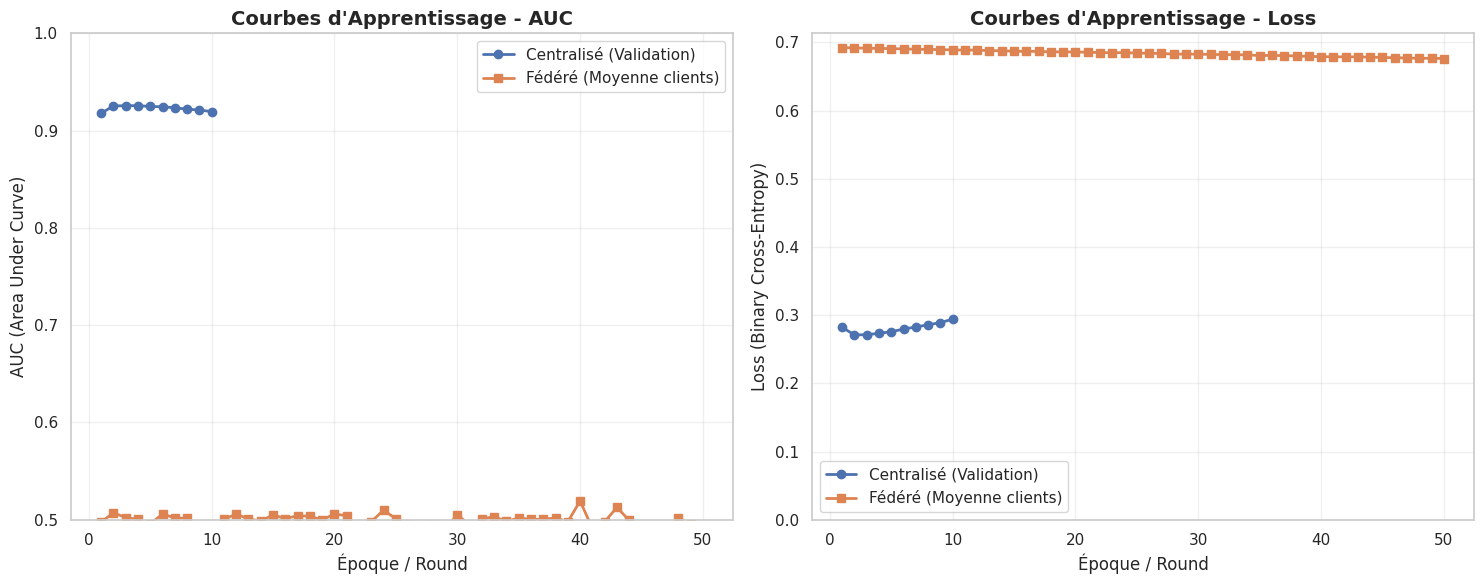


STATISTIQUES COMPARATIVES - COURBES D'APPRENTISSAGE
AUC finale:
  • Centralisé: 0.9196
  • Fédéré: 0.4863
  • Différence: 0.4333

Loss finale:
  • Centralisé: 0.2941
  • Fédéré: 0.6764
  • Différence: 0.3824


In [20]:
# Créer une figure avec deux sous-graphiques pour comparer les courbes d'apprentissage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

if centralized_df is not None and federated_df is not None:
    # Graphique 1: Comparaison de l'AUC
    ax1.plot(centralized_df.index + 1, centralized_df['val_auc'], 
             label='Centralisé (Validation)', marker='o', linewidth=2)
    ax1.plot(federated_df['round'], federated_df['auc'], 
             label='Fédéré (Moyenne clients)', marker='s', linewidth=2)
    
    ax1.set_title('Courbes d\'Apprentissage - AUC', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Époque / Round')
    ax1.set_ylabel('AUC (Area Under Curve)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(0.5, 1.0)
    
    # Graphique 2: Comparaison de la Loss
    ax2.plot(centralized_df.index + 1, centralized_df['val_loss'], 
             label='Centralisé (Validation)', marker='o', linewidth=2)
    ax2.plot(federated_df['round'], federated_df['loss'], 
             label='Fédéré (Moyenne clients)', marker='s', linewidth=2)
    
    ax2.set_title('Courbes d\'Apprentissage - Loss', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Époque / Round')
    ax2.set_ylabel('Loss (Binary Cross-Entropy)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(bottom=0)
    
    plt.tight_layout()
    plt.show()
    
    # Afficher quelques statistiques comparatives
    print("\n" + "="*60)
    print("STATISTIQUES COMPARATIVES - COURBES D'APPRENTISSAGE")
    print("="*60)
    
    # AUC finale
    final_centralized_auc = centralized_df['val_auc'].iloc[-1]
    final_federated_auc = federated_df['auc'].iloc[-1]
    
    print(f"AUC finale:")
    print(f"  • Centralisé: {final_centralized_auc:.4f}")
    print(f"  • Fédéré: {final_federated_auc:.4f}")
    print(f"  • Différence: {abs(final_centralized_auc - final_federated_auc):.4f}")
    
    # Loss finale
    final_centralized_loss = centralized_df['val_loss'].iloc[-1]
    final_federated_loss = federated_df['loss'].iloc[-1]
    
    print(f"\nLoss finale:")
    print(f"  • Centralisé: {final_centralized_loss:.4f}")
    print(f"  • Fédéré: {final_federated_loss:.4f}")
    print(f"  • Différence: {abs(final_centralized_loss - final_federated_loss):.4f}")
    
else:
    print("ERREUR: Impossible de créer les courbes d'apprentissage.")
    print("Vérifiez que les données centralisées et fédérées sont chargées correctement.")

In [15]:
# La baseline est la meilleure performance obtenue par le modèle centralisé sur l'ensemble de validation
if 'centralized_df' in locals():
    # La colonne est nommée 'val_auc' par Keras
    baseline_auc = centralized_df['val_auc'].max()
    baseline_epoch = centralized_df['val_auc'].idxmax() + 1
    print(f"Performance de la Baseline (Centralisée) :")
    print(f"  - Meilleure AUC de validation : {baseline_auc:.4f}")
    print(f"  - Atteinte à l'époque : {baseline_epoch}")

Performance de la Baseline (Centralisée) :
  - Meilleure AUC de validation : 0.9257
  - Atteinte à l'époque : 4


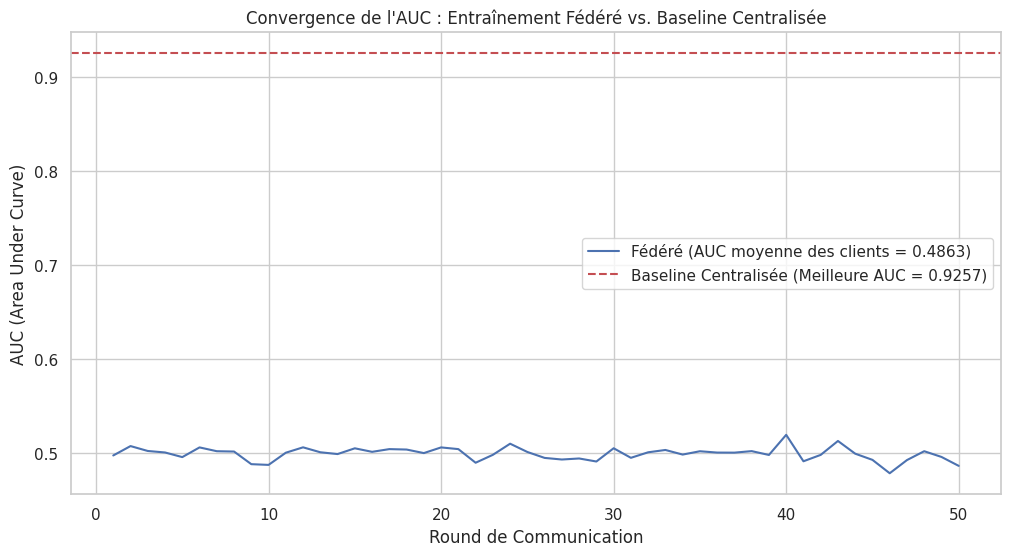

In [16]:
if 'centralized_df' in locals() and 'federated_df' in locals():
    plt.figure()
    
    # Tracer la courbe de l'AUC fédérée (moyenne des clients)
    sns.lineplot(data=federated_df, x='round', y='auc', label=f'Fédéré (AUC moyenne des clients = {federated_df["auc"].iloc[-1]:.4f})')
    
    # Tracer une ligne horizontale pour la baseline centralisée
    plt.axhline(y=baseline_auc, color='r', linestyle='--', label=f'Baseline Centralisée (Meilleure AUC = {baseline_auc:.4f})')
    
    plt.title('Convergence de l\'AUC : Entraînement Fédéré vs. Baseline Centralisée')
    plt.xlabel('Round de Communication')
    plt.ylabel('AUC (Area Under Curve)')
    plt.legend()
    plt.grid(True)
    plt.show()

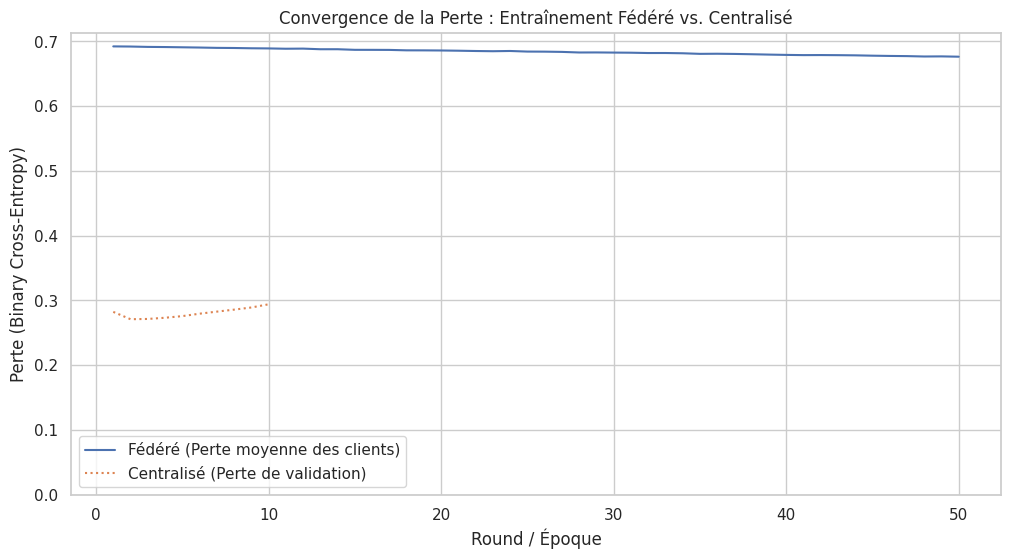

In [18]:
if 'centralized_df' in locals() and 'federated_df' in locals():
    plt.figure()

    # Tracer la courbe de la perte fédérée
    sns.lineplot(data=federated_df, x='round', y='loss', label='Fédéré (Perte moyenne des clients)')
    
    # Tracer la courbe de la perte de validation centralisée
    sns.lineplot(data=centralized_df, x=centralized_df.index + 1, y='val_loss', label='Centralisé (Perte de validation)', linestyle=':')
    
    plt.title('Convergence de la Perte : Entraînement Fédéré vs. Centralisé')
    plt.xlabel('Round / Époque')
    plt.ylabel('Perte (Binary Cross-Entropy)')
    plt.legend()
    plt.grid(True)
    plt.ylim(bottom=0) # La perte ne peut pas être négative
    plt.show()

In [ ]:
if 'centralized_df' in locals() and 'federated_df' in locals():
    # Performance finale du modèle fédéré (au dernier round)
    federated_final_metrics = federated_df.iloc[-1]
    
    # Meilleure performance du modèle centralisé
    centralized_best_metrics = centralized_df.loc[centralized_df['val_auc'].idxmax()]

    summary_data = {
        'Métrique': ['AUC', 'Accuracy', 'Loss'],
        'Baseline Centralisée (Meilleure)': [
            centralized_best_metrics['val_auc'],
            centralized_best_metrics['val_accuracy'],
            centralized_best_metrics['val_loss']
        ],
        'Fédéré (Dernier Round)': [
            federated_final_metrics['auc'],
            federated_final_metrics['accuracy'],
            federated_final_metrics['loss']
        ]
    }
    
    summary_df = pd.DataFrame(summary_data)
    
    # Calculer le ratio de performance
    performance_ratio = (federated_final_metrics['auc'] / baseline_auc) * 100
    
    print("="*50)
    print("Tableau Récapitulatif des Performances Finales")
    print("="*50)
    display(summary_df.round(4))
    print(f"\nLe modèle fédéré atteint {performance_ratio:.2f}% de la performance maximale de la baseline en termes d'AUC.")

Tableau Récapitulatif des Performances Finales


,Métrique,Baseline Centralisée (Meilleure),Fédéré (Dernier Round)
0,AUC,0.9257,0.4863
1,Accuracy,0.8826,0.8000
2,Loss,0.2733,0.6764



Le modèle fédéré atteint 52.53% de la performance maximale de la baseline en termes d'AUC.
